> # **Daegu Apartment**

Dataset Daegu Apartment: [data_daegu_apartment.csv] ()

*Dataset* Daegu Apartment adalah kumpulan data yang digunakan untuk menganalisis faktor-faktor yang memengaruhi harga apartemen di kota Daegu, Korea Selatan. Data ini mencakup berbagai atribut seperti tipe apartemen, jarak ke stasiun *subway* terdekat, jumlah fasilitas di sekitar, ukuran apartemen, dan tahun pembangunan. *Dataset* ini dirancang untuk mendukung penyelesaian Capstone Project Module 3 dalam program Data Science di Purwadhika Jakarta.

Proyek ini bertujuan untuk membangun model prediktif yang dapat memperkirakan harga apartemen di kota Daegu, Korea Selatan secara akurat berdasarkan faktor-faktor atribut dalam *dataset*. Diharapkan, model ini dapat membantu dalam pengambilan keputusan strategis, seperti penetapan harga jual atau pembelian apartemen.

-----

## **Contents**

1. Business Problem Understanding
2. Data Understanding and Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

-----

## **1. Business Problem Understanding**

### 1.1 Context

Daegu adalah kota terbesar keempat di Korea Selatan, setelah Seoul, Busan, dan Incheon. Daegu berlokasi di daerah perbukitan dengan pemandangan yang indah dan memiliki banyak destinasi wisata yang menarik. Sehingga, menjadikan Daegu sebagai salah satu tujuan bagi wisatawan lokal maupun mancanegara. Dengan populasi lebih dari 2,4 juta orang, Daegu dikenal sebagai kota metropolitan dengan penduduk yang cukup padat.

Dengan kepadatan penduduk tersebut, apartemen menjadi salah satu solusi untuk memenuhi kebutuhan hunian bagi masyarakat modern, terutama di wilayah perkotaan yang memiliki keterbatasan lahan tempat tinggal dan aktivitas bisnis yang padat. Oleh karena itu, menarik untuk mengkaji harga apartemen yang dipengaruhi oleh berbagai faktor internal (seperti ukuran, fasilitas dalam apartemen) dan eksternal (seperti lokasi, akses transportasi, serta fasilitas di sekitar).

Biasanya, individu atau perusahaan akan menawarkan unit apartemen dengan menentukan harga secara mandiri. Proses ini sering kali menimbulkan kesulitan bagi pemilik apartemen dalam menyesuaikan harga sesuai dengan kondisi pasar. Jika harga yang ditetapkan terlalu tinggi dibandingkan harga pasar, maka unit apartemen akan sulit terjual. Sebaliknya, jika harga terlalu rendah, maka pemilik apartemen akan berpotensi kehilangan keuntungan maksimal yang seharusnya bisa didapatkan.

Keseimbangan dalam menetapkan harga menjadi kunci penting, sehingga perlu untuk memahami faktor-faktor yang memengaruhi harga apartemen agar **penawaran yang diberikan dapat menarik bagi pembeli sekaligus memberikan keuntungan yang optimal bagi penjual**.

### 1.2 Problem Statement

Permasalahan kali ini adalah **kesulitan dalam menentukan harga jual apartemen yang ideal** di wilayah Daegu, terutama dengan mempertimbangkan fasilitas dan fitur yang dimiliki setiap unit. Untuk mengatasi tantangan ini, diperlukan model prediksi harga yang akurat guna membantu menentukan harga jual yang lebih kompetitif.

### 1.3 Goals

Berdasarkan permasalahan yang dihadapi, pemilik atau agen properti memerlukan sistem yang mampu memprediksi dan membantu pemilik apartemen dalam **menentukan harga jual properti yang ideal**. Perbedaan dalam karakteristik properti, seperti tahun pembangunan, kedekatan dengan fasilitas publik, lokasi strategis, serta tipe apartemen, dapat dijadikan faktor penting dalam meningkatkan keakuratan prediksi harga.

Dengan demikian, tujuan dari model prediksi ini diharapkan tidak hanya **mempermudah penetapan harga jual**, namun juga **memberikan keuntungan optimal** bagi pemilik properti, serta **menetapkan harga yang seimbang**, sehingga bisa menciptakan keseragaman rata-rata harga antar apartemen di wilayah Daegu.

### 1.4 Analytic Approach

Langkah pertama yang perlu dilakukan adalah **menganalisis data untuk mengidentifikasi pola dari berbagai fitur** yang membedakan satu apartemen dengan lainnya. Analisis ini bertujuan untuk memahami hubungan antara karakteristik apartemen dengan harga jualnya.

Selanjutnya, **merancang dan membangun model regresi** yang berfungsi sebagai **alat prediksi rekomendasi harga jual** unit yang lebih akurat dan mendukung pemilik atau agen properti dalam menetapkan harga jual yang kompetitif di pasar.

### 1.5 Metric Evaluation

Metode evaluasi yang digunakan untuk model regresi mencakup **RMSE**, **MAE**, dan **MAPE**.
- RMSE (Root Mean Squared Error) mengukur akar kuadrat dari rata-rata kesalahan prediksi.
- MAE (Mean Absolute Error) menghitung rata-rata nilai absolut dari kesalahan prediksi.
- MAPE (Mean Absolute Percentage Error) menunjukkan rata-rata persentase kesalahan prediksi.
Semakin kecil nilai RMSE, MAE, dan MAPE, semakin baik model tersebut dalam memprediksi harga apartemen berdasarkan fitur yang digunakan.

Selain itu, metrik **R-Squared (R2)** juga dapat digunakan. R-Squared (koefisien determinasi) mengukur sejauh mana variabilitas data dapat dijelaskan oleh model, dengan nilai berkisar antara 0 hingga 1. Nilai yang mendekati 1 menunjukkan bahwa model mampu merepresentasikan data dengan baik. Namun, R-Squared hanya relevan untuk model linear, sehingga tidak dapat digunakan untuk mengevaluasi model non-linear.

Penggunaan kombinasi metrik ini memberikan gambaran yang lebih komprehensif tentang performa model dan memastikan akurasi dalam memprediksi harga apartemen.

## **2. Data Understanding and Exploratory Data Analysis (EDA)**

- *Dataset* merupakan data *listing* apartemen di Daegu, Korea Selatan yang diambil dari laman [data.go.kr](https://www.data.go.kr/) dari tahun 2007 hingga 2017.
- Setiap baris data merepresentasikan informasi terkait unit apartemen.

### 2.1 Library

In [1]:
# Import Library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# EDA
from pandas_profiling import ydata_profiling

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\Rafli Fauzan\AppData\Local\Temp\ipykernel_11920\610807017.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ydata_profiling


### 2.2 Data Understanding

In [2]:
# Load Dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
# Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


| **Attributes** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Apartment type |
| TimeToSubway | Object | Time needed to the nearest subway station |
| SubwayStation | Object | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC) | Float | The number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | The number of public office facilities nearby |
| N_SchoolNearBy(University) | Float | The number of universities nearby |
| N_Parkinglot(Basement) | Float | The number of the parking lot |
| YearBuilt | Integer | The year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities in the apartment |
| Size(sqf) | Integer | The apartment size (in square feet) |
| SalePrice | Integer | The apartment price (in Korean Won/KRW) |

Menampilkan informasi umum mengenai tipe data, jumlah nilai non-null, dan data unik di setiap kolom dalam *dataset*.

In [4]:
df_desc = []

for i in df.columns:
    df_desc.append([i,
                    df[i].dtypes,
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].unique()])

df_deepInfo = pd.DataFrame(df_desc, columns = ['columns', 'data_type', 'null', 'null%', 'unique','sample'])
print(len(df_deepInfo.values))
print(f"Amount of Data: {len(df)}")
df_deepInfo

11
Amount of Data: 4123


,columns,data_type,null,null%,unique,sample
0,HallwayType,object,0,0.0,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,object,0,0.0,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,int64,0,0.0,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0,0.0,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0,0.0,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


In [5]:
# Pengecekan Nilai 0
df[df['N_FacilitiesNearBy(ETC)'] == 0]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
6,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1334,326548
9,corridor,5min~10min,Banwoldang,0.0,3.0,2.0,108.0,2014,2,288,99823
15,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,144752
...,...,...,...,...,...,...,...,...,...,...,...
4112,corridor,5min~10min,Banwoldang,0.0,3.0,2.0,108.0,2014,2,288,96017
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008


In [6]:
# Pengecekan Nilai 0
df[df['N_FacilitiesNearBy(PublicOffice)'] == 0]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
26,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
114,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,460176
316,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,338053
337,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,362831
390,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1256,469026
436,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,362831
443,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,361946
545,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,357522
566,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,451327


In [7]:
# Pengecekan Nilai 0
df[df['N_SchoolNearBy(University)'] == 0]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
26,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
50,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,61946
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
114,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,460176
118,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,587,66371
...,...,...,...,...,...,...,...,...,...,...,...
3807,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,587,123008
3857,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,367256
4001,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,587,115044
4035,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,353982


Berdasarkan informasi tersebut, dapat dilihat bahwa *dataset*:
- Memiliki **4123 baris** dan **11 kolom (atribut)**.
- Tidak memiliki *missing value*.
- Memiliki **3 kolom kategorikal** dan **8 kolom numerikal** yang dibagi kedalam jenis *float* dan *integer*.
- Beberapa kolom memiliki data dengan nilai 0, yang dapat diinterpretasikan sebagai ketidaktersediaan fasilitas pada setiap kolom tersebut, seperti *Public Office*, *Parking Lot*, *University*, dll.

### 2.3 Exploratory Data Analysis (EDA)

#### 2.3.1 Analisis Statistik

In [8]:
# Analisis Statistik
display(df.describe().round(2), df.describe(include=['object']))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.00,4123.00,4123.00,4123.00,4123.00,4123.00,4123.00,4123.00
mean,1.93,4.14,2.75,568.98,2003.00,5.82,954.63,221767.93
std,2.20,1.80,1.50,410.37,8.91,2.34,383.81,106739.84
min,0.00,0.00,0.00,0.00,1978.00,1.00,135.00,32743.00
25%,0.00,3.00,2.00,184.00,1993.00,4.00,644.00,144752.00
50%,1.00,5.00,2.00,536.00,2006.00,5.00,910.00,209734.00
75%,5.00,5.00,4.00,798.00,2008.00,7.00,1149.00,291150.00
max,5.00,7.00,5.00,1321.00,2015.00,10.00,2337.00,585840.00


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [9]:
# Cek Apartemen dengan Harga Termahal
df[df['SalePrice']==585840.00]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840


In [10]:
# Cek Apartemen dengan Harga Termurah
df[df['SalePrice']==32743.00]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
1908,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,32743


#### 2.3.2 Distribusi SalePrice

<Figure size 1000x700 with 0 Axes>

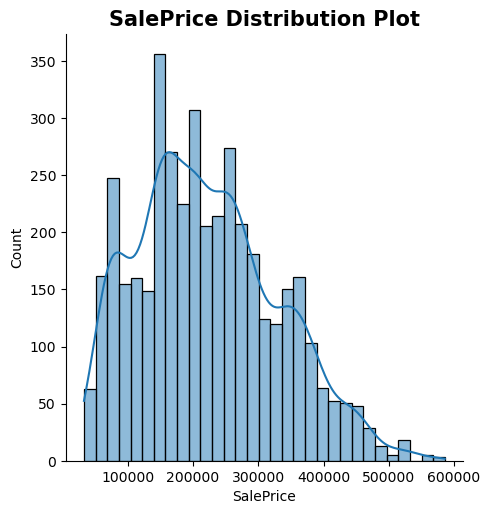

In [11]:
# Plot Distribusi kolom `SalePrice`
plt.figure(figsize=(10,7))
sns.displot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution Plot', size=15, weight='bold')
plt.show()

Terlihat adanya distribusi yang condong ke kanan ***(right-skewed distribution)***. Hal ini menunjukkan bahwa fitur `SalePrice` memiliki *skewness* positif, di mana sebagian besar nilai berada di rentang yang lebih rendah, sementara beberapa harga yang sangat tinggi menarik distribusi ke arah kanan.

#### 2.3.3 AutoEDA

In [12]:
# ydata_profiling.ProfileReport(df, title = 'Daegu Apartment EDA')

Berdasarkan analisis *dataset* apartemen di Daegu, berikut adalah informasi yang dapat disimpulkan:

1. **Distribusi HallwayType**  
   - Tipe apartemen paling dominan adalah **"terraced"** dengan persentase sebesar **61.31%**.  
   - Diikuti oleh tipe **"mixed"** sebanyak **27.43%**.  
   - Tipe **"corridor"** menjadi yang paling sedikit, hanya sebesar **11.25%**.

2. **Jarak Apartemen ke Stasiun Kereta**  
   - **47.4%** apartemen berada **sangat dekat dengan stasiun kereta**, membutuhkan waktu **0-5 menit** untuk mencapainya.  
   - **Kyungbuk University Hospital Station** adalah stasiun yang paling dekat dengan mayoritas apartemen.

3. **Tahun Pembangunan**  
   - Tahun apartemen dibagun adalah **1978** (tertua) dan **2015** (terbaru).
   - Tahun **2007** merupakan periode di mana jumlah pembangunan apartemen di Daegu mencapai puncaknya.

4. **Fasilitas Dalam Apartemen**  
   - Apartemen di Daegu rata-rata memiliki **6 fasilitas internal**, menunjukkan kualitas fasilitas yang cukup baik.

5. **Ukuran dan Harga Apartemen**  
   - Rata-rata ukuran apartemen adalah **954.63 square feet**, dengan variasi yang cukup beragam.  
   - Rata-rata harga apartemen adalah **221767.93 won**, mencerminkan nilai pasar yang dinamis.


## **3. Data Preprocessing**

Pada tahap ini, proses pembersihan data dilakukan untuk memastikan data siap digunakan dalam analisis lebih lanjut. Berikut adalah langkah-langkah yang dilakukan:

1. **Penanganan Tipe Data**

2. **Penanganan Missing Value**

3. **Penanganan Duplicate Data**

4. **Penanganan Data Outliers**

5. **Membuat Data Lebih Konsisten**

Untuk memastikan bahwa proses ini tidak memengaruhi data asli, tahap *preprocessing* dan *feature engineering* dilakukan dengan menggunakan salinan (*duplicate*) dari dataframe awal.

In [13]:
# Duplikasi Dataframe
df_model = df.copy()

### 3.1 Penanganan Tipe Data

In [14]:
# Mengubah Tipe Data dari Float menjadi Integer
df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype('int64')
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype('int64')
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype('int64')

In [15]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4123 non-null   object
 1   TimeToSubway                      4123 non-null   object
 2   SubwayStation                     4123 non-null   object
 3   N_FacilitiesNearBy(ETC)           4123 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   int64 
 5   N_SchoolNearBy(University)        4123 non-null   int64 
 6   N_Parkinglot(Basement)            4123 non-null   int64 
 7   YearBuilt                         4123 non-null   int64 
 8   N_FacilitiesInApt                 4123 non-null   int64 
 9   Size(sqf)                         4123 non-null   int64 
 10  SalePrice                         4123 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 354.4+ KB


### 3.2 Penanganan Missing Value

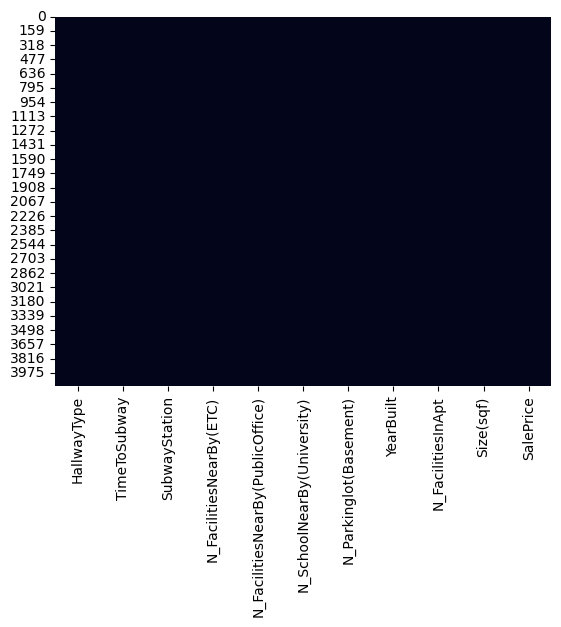

In [16]:
# Missing Value Heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Tidak terdapat *missing value* dalam *dataset*.

### 3.3 Penanganan Duplicate Data

In [17]:
# Cek Data Duplikat
print(f'Jumlah data duplikat dalam dataset: {df_model.duplicated().sum()} baris\n')
display(df_model[df_model.duplicated()])

Jumlah data duplikat dalam dataset: 1422 baris



,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0,0,0,203,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0,2,2,524,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0,3,2,400,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5,7,5,0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141


*Dataset* memiliki **1422 baris data duplikat**. Oleh karena itu, diputuskan untuk menghapus data duplikat tersebut dan hanya mempertahankan baris pertama dari setiap data yang duplikat sebagai representasi data.

In [18]:
# Hapus Data Duplikat
df_model.drop_duplicates(keep='first', inplace=True)
print(f'Jumlah data duplikat dalam dataset: {df_model.duplicated().sum()} baris\n')

Jumlah data duplikat dalam dataset: 0 baris



### 3.4 Penanganan Data Outliers

Adanya *outliers* dalam data dapat memengaruhi hasil analisis dan pemodelan yang dilakukan. Sebelum memutuskan bagaimana menangani *outliers*, penting untuk mempertimbangkan berbagai faktor, termasuk pemahaman mendalam tentang *domain* yang terkait dengan data tersebut.

<Axes: >

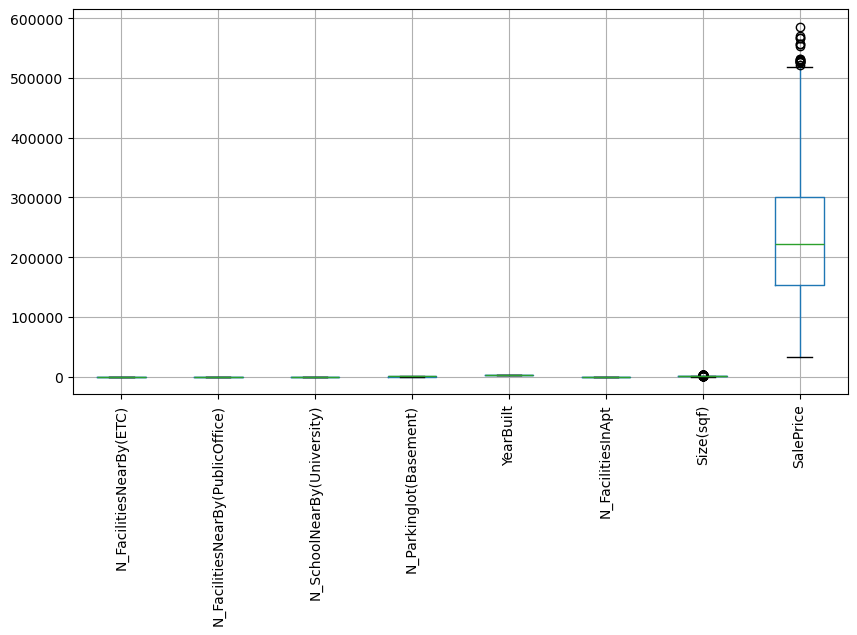

In [19]:
# Cek Outliers
plt.figure(figsize=(10,5))
df_model.boxplot(rot=90)

Berdasarkan boxplot, fitur `SalePrice` dan `Size(sqft)` menunjukkan adanya *outliers*. Untuk mengatasi hal ini, langkah rekayasa data akan dilakukan pada kedua fitur tersebut dengan menggunakan metode **Interquartile Range (IQR)**. 

Model yang akan dibangun hanya akan dapat memprediksi data baru yang memiliki nilai dalam rentang data yang ada pada dataset yang telah dibersihkan. Hasil prediksi yang berada di luar rentang data yang telah dibersihkan dapat menyebabkan bias pada model.

In [20]:
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

#### 3.4.1 Size(sqf)

In [21]:
outlier(df_model['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [22]:
df_model['Size(sqf)'].describe()

count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [23]:
# Jumlah Nilai 'Size (sqf)' > 1803.0
df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)']

84

Berdasarkan tabel statistik deskriptif, nilai **kuartil ketiga (75%)** pada kolom `Size(sqf)` adalah **1167**, sementara nilai maksimumnya adalah **2337**, yang lebih besar dari nilai kuartil ketiga tersebut. Ini menunjukkan bahwa distribusi data pada fitur `Size(sqf)` memiliki **kemiringan ke kanan (positif skewness)**.

Oleh karena itu, untuk mengurangi kemiringan data, **data dengan nilai di atas batas atas yang dihitung menggunakan metode IQR** akan dihapus dan tidak akan dimasukkan dalam proses **modeling**. Langkah ini diambil untuk memperbaiki distribusi data, namun perlu dicatat bahwa ini akan menjadi **batasan** pada model yang akan dibangun.

Text(0.5, 0, 'Selected Size(sqf)')

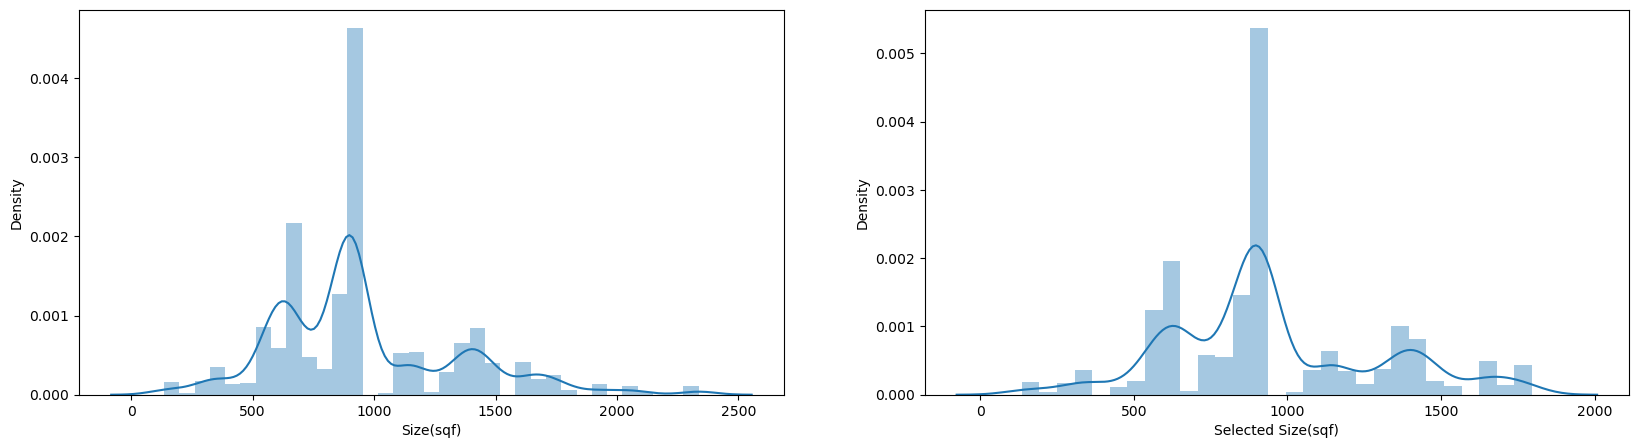

In [24]:
# Filter Data Outliers
df_model = df_model[(df_model['Size(sqf)'] <= 1803.0)]

# Plot Distribusi Sebelum dan Sesudah Filtering
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.distplot(df['Size(sqf)'], ax=axes[0])
sns.distplot(df_model['Size(sqf)'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Selected Size(sqf)')

#### 3.4.1 SalePrice

In [25]:
outlier(df_model['SalePrice'])

IQR: 144248.0
limit_bawah: -65930.0
limit_atas: 511062.0


In [26]:
df_model['SalePrice'].describe()

count      2617.000000
mean     225281.601834
std      102129.386220
min       32743.000000
25%      150442.000000
50%      217699.000000
75%      294690.000000
max      566371.000000
Name: SalePrice, dtype: float64

In [27]:
# Jumlah Nilai 'SalePrice' > 511062.0
df_model[df_model['SalePrice'] > 511062.0].count()['SalePrice']

10

Berdasarkan tabel statistik deskriptif, nilai **kuartil ketiga (75%)** pada kolom `SalePrice` adalah **294690**, sementara nilai maksimumnya adalah **566371**, yang lebih besar dari nilai kuartil ketiga tersebut. Ini menunjukkan bahwa distribusi data pada fitur `SalePrice` memiliki **kemiringan ke kanan (positif skewness)**.

Oleh karena itu, untuk mengurangi kemiringan data, **data dengan nilai di atas batas atas yang dihitung menggunakan metode IQR** akan dihapus dan tidak akan dimasukkan dalam proses **modeling**. Langkah ini diambil untuk memperbaiki distribusi data, namun perlu dicatat bahwa ini akan menjadi **batasan** pada model yang akan dibangun.

Text(0.5, 0, 'Selected Size(sqf)')

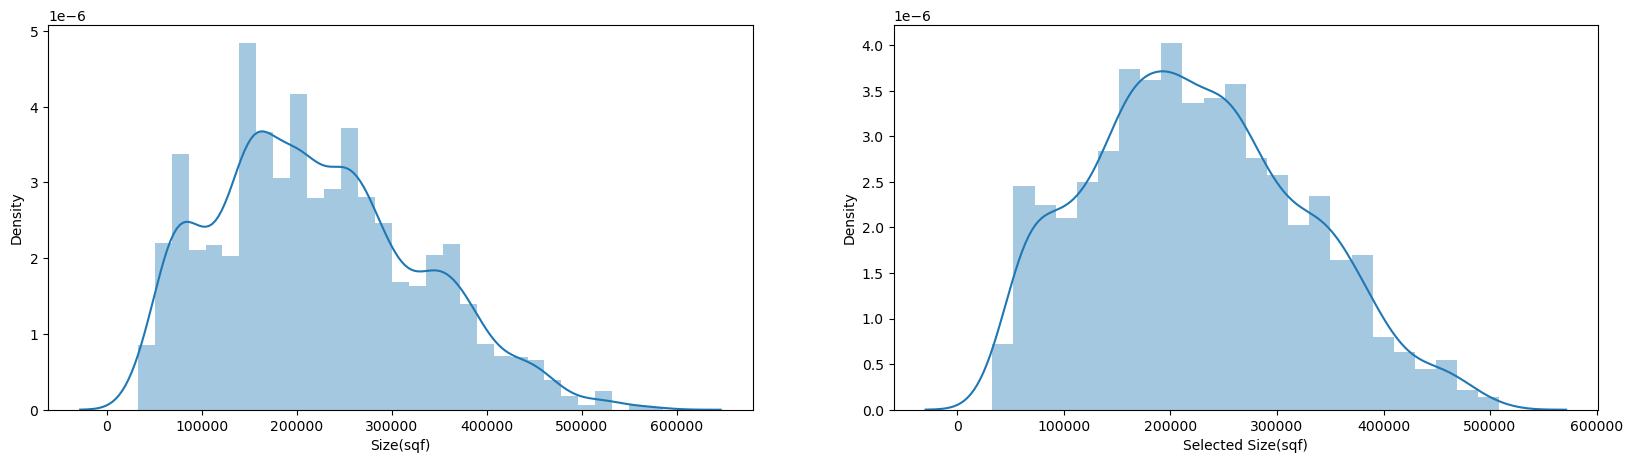

In [28]:
# Filter Data Outliers
df_model = df_model[(df_model['SalePrice'] <= 511062.0)]

# Plot Distribusi Sebelum dan Sesudah Filtering
fig, axes = plt.subplots(1,2, figsize=(20, 5))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Selected Size(sqf)')

<Axes: >

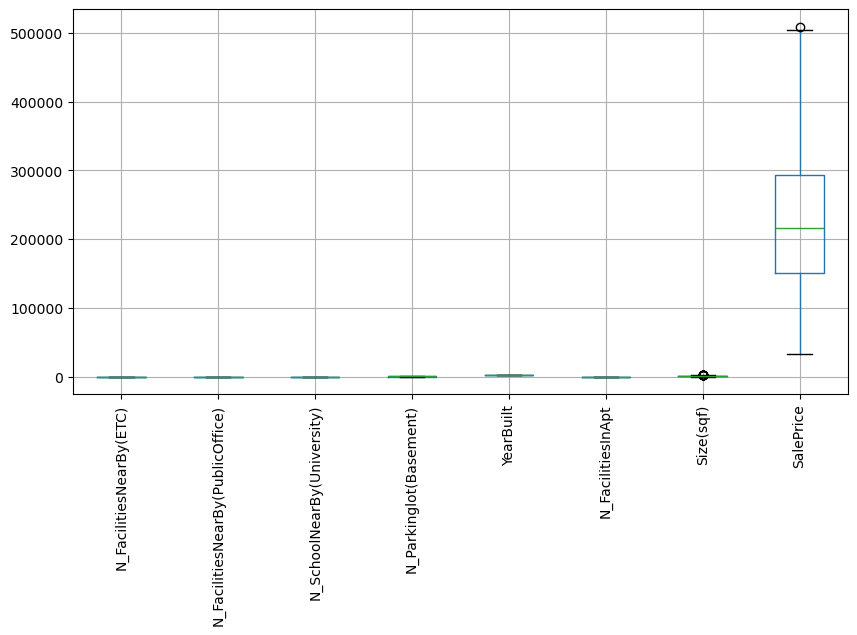

In [29]:
# Cek Outliers
plt.figure(figsize=(10,5))
df_model.boxplot(rot=90)

### 3.5 Membuat Data Lebih Konsisten

In [30]:
# Mengganti ~ dengan - di kolom 'TimeToSubway'
df_model['TimeToSubway'] = df_model['TimeToSubway'].str.replace('~', '-')

# Mengganti _ dengan - di kolom 'SubwayStation'
df_model['SubwayStation'] = df_model['SubwayStation'].str.replace('_', '-')

### 3.6 Clean Dataset

In [31]:
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk-uni-hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk-uni-hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [32]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2607 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2607 non-null   object
 1   TimeToSubway                      2607 non-null   object
 2   SubwayStation                     2607 non-null   object
 3   N_FacilitiesNearBy(ETC)           2607 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2607 non-null   int64 
 5   N_SchoolNearBy(University)        2607 non-null   int64 
 6   N_Parkinglot(Basement)            2607 non-null   int64 
 7   YearBuilt                         2607 non-null   int64 
 8   N_FacilitiesInApt                 2607 non-null   int64 
 9   Size(sqf)                         2607 non-null   int64 
 10  SalePrice                         2607 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 244.4+ KB


Setelah dilakukan pemfilteran terhadap outliers, jumlah data yang tersisa untuk digunakan dalam proses pemodelan adalah **2607** atau sekitar **36,7%** data telah dihapus.

## **4. Feature Engineering**

### 4.1 Encoding

**Encoding** adalah proses mengubah data dari format tertentu menjadi format lain, umumnya pada data kategorikal agar bisa digunakan dalam model. Dalam dataset ini, ada beberapa fitur yang berisi data kategorikal, sehingga perlu dilakukan encoding untuk mengubahnya menjadi format numerik. Berikut adalah fitur yang akan diencoding:

1. `HallwayType`:
   Fitur ini menggunakan **One-Hot Encoding** karena memiliki **tiga kategori**.

2. `SubwayStation`:
   Fitur ini menggunakan **Binary Encoding** karena terdiri dari **delapan kategori**.

3. `TimeToSubway`:
   Fitur ini menggunakan **Ordinal Encoding** karena waktu dapat diurutkan dari yang **terjauh** (jauh dari stasiun) hingga yang **terdekat** (dekat dengan stasiun).

In [33]:
# Value Counts 'TimeToSubway'
df_model['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1186
5min-10min             501
10min-15min            426
15min-20min            394
no_bus_stop_nearby     100
Name: count, dtype: int64

In [34]:
ordinal_mapping = [
    {'col':'TimeToSubway',
     'mapping':{'no_bus_stop_nearby':0, '15min-20min':1, '10min-15min':2, '5min-10min':3, '0-5min':4 }}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
                                ('one_hot_encoder', OneHotEncoder(drop='first'), ['HallwayType']),
                                ('binary_encoder', ce.BinaryEncoder(), ['SubwayStation']),
                                ('ordinal_encoder', ce.OrdinalEncoder(), ['TimeToSubway'])
], remainder='passthrough')

## **5. Modeling**

### 5.1 Train and Test Splitting

- x = Features
- y = Target

In [35]:
x = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

Membagi data dengan proporsi **80:20** berarti memisahkan dataset menjadi dua bagian, di mana **80%** data digunakan untuk melatih model **(training)** dan **20%** sisanya digunakan untuk menguji kinerja model **(testing)**. Data training digunakan untuk membangun dan mengoptimalkan model, sedangkan data testing digunakan untuk mengevaluasi seberapa baik model yang telah dilatih dalam memprediksi data yang belum pernah dilihat sebelumnya.

In [36]:
randomstate = 42

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=randomstate
)

### 5.2 Scaling dan Modeling

Pemodelan akan dilakukan dalam **skala logaritmik** untuk mengatasi masalah distribusi data yang tidak seimbang dan mengurangi pengaruh nilai-nilai yang sangat besar. Setelah pemodelan selesai, data akan dikembalikan ke skala aslinya untuk memudahkan interpretasi dan penerjemahan dalam konteks bisnis atau aplikasi praktis.

Untuk proses **scaling**, yang akan digunakan adalah **Standard Scaling**. Standard scaling adalah teknik penskalaan fitur dalam *machine learning* yang membuat data memiliki **mean 0** dan **standar deviasi 1**. Proses ini dilakukan dengan mengurangi rata-rata setiap fitur dari setiap data, kemudian membagi hasilnya dengan standar deviasi fitur tersebut. Hasil akhirnya adalah dataset dengan rata-rata 0 dan standar deviasi 1, yang membantu algoritma *machine learning* untuk lebih cepat beradaptasi dan memberikan hasil yang lebih baik. Teknik ini bermanfaat ketika fitur memiliki unit pengukuran yang berbeda atau rentang nilai yang bervariasi, karena menyamakan skala fitur dan meningkatkan kinerja model.

In [38]:
# Menentukan Algoritma Model yang Akan Digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=randomstate)
rf = RandomForestRegressor(random_state=randomstate)
xgb = XGBRegressor(random_state=randomstate)

# Pemodelan Dilakukan Dalam Skala Logaritmik, tetapi Kemudian Dibalik Untuk Interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Data Scaling
scaler = StandardScaler()

# Kandidat Algoritma Model
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Menemukan Algoritma Model Terbaik Berdasarkan Setiap Metrik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=randomstate)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise')
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[0.70004054 0.70177834 0.69512782 0.72941221 0.70290443] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-55700.9660072  -54110.52423107 -56815.35807909 -52091.08848432
 -53586.65546966] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-45857.68251342 -43768.13952884 -45507.35388267 -41443.96805278
 -43332.33399085] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22226946 -0.21322846 -0.22121027 -0.22437362 -0.22446955] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.76989469 0.77219297 0.76124981 0.76954112 0.76241207] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegresso

In [39]:
# Hasil Evaluasi 5 Algoritma Model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_R2,Std_R2,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,0.705853,0.012076,-54460.918454,1648.290620,-43981.895594,1597.141052,-0.221110,0.004133
1,KNN Regressor,0.767058,0.004380,-48470.175614,1021.158384,-37659.378523,826.813355,-0.191442,0.008265
2,DecisionTree Regressor,0.798613,0.009745,-45054.157773,1294.288295,-35656.369410,974.705262,-0.184131,0.006584
3,RandomForest Regressor,0.800120,0.008394,-44884.687161,1001.132558,-35578.820759,877.860047,-0.182651,0.006014
4,XGBoost Regressor,0.799690,0.008864,-44933.398825,1114.404416,-35612.022405,944.121644,-0.183603,0.006616


Berdasarkan tabel tersebut, **Decision Tree Regressor, Random Forest Regressor** dan **XGBoost Regressor** memiliki mean R2, mean RMSE, mean MAE, dan mean MAPE yang tinggi. Model-model ini juga memiliki standar deviasi yang kecil, yang mengindikasikan bahwa hasilnya relatif konsisten.

Oleh karena itu, diantara lima model yang dibandingkan, **Decision Tree Regressor, Random Forest Regressor** dan **XGBoost Regressor** dapat dianggap sebagai model terbaik.

In [40]:
# Benchmark 3 Model Terbaik

models = {
    'DecisionTree Regression' : DecisionTreeRegressor(random_state=randomstate),
    'RandomForest' : RandomForestRegressor(random_state=randomstate),
    'XGB' : XGBRegressor(random_state=randomstate)

}

score_r2 = []
score_rmse = []
score_mae = []
score_mape = []

# Testing Prediction
for i in models :
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    score_r2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R2': score_r2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())

print('Testing Results Before Tuning')
display(score_before_tuning)

Testing Results Before Tuning


,R2,RMSE,MAE,MAPE
DecisionTree Regression,0.792747,45764.591804,37364.571125,0.194448
RandomForest,0.792673,45772.766859,37342.452750,0.193646
XGB,0.792752,45764.104485,37363.782941,0.194438


Model **XGBoost** dipilih sebagai model terbaik berdasarkan beberapa pertimbangan berikut:

1. **R2 (Koefisien Determinasi) yang Lebih Tinggi**
XGBoost memiliki nilai **R2 sebesar 0.792752**, yang sedikit lebih tinggi dibandingkan dengan **DecisionTree Regression (0.792747)** dan **RandomForest (0.792673)**. Nilai R2 ini menunjukkan seberapa baik model dapat menjelaskan variasi data. Meskipun perbedaannya sangat kecil, XGBoost sedikit lebih baik dalam hal ini.

2. **Kinerja RMSE, MAE, dan MAPE yang Setara**
Ketiga metrik kesalahan—**RMSE**, **MAE**, dan **MAPE**—untuk **XGBoost** sangat mirip dengan **DecisionTree Regression** dan **RandomForest**. Hasil ini menunjukkan bahwa XGBoost tetap memberikan performa yang sangat kompetitif dalam hal prediksi, tanpa ada perbedaan yang signifikan pada tingkat kesalahan prediksi dibandingkan dengan dua model lainnya.

3. **Kemampuan Model yang Lebih Stabil**
XGBoost dikenal dengan kemampuannya untuk menangani data yang lebih kompleks dan memiliki regulasi yang lebih baik dalam mencegah overfitting dibandingkan dengan **DecisionTree** atau **RandomForest**. Ini menjadikan **XGBoost** pilihan yang lebih robust dalam banyak situasi.

4. **Kecepatan dan Efisiensi**
Selain keunggulan dalam akurasi, XGBoost umumnya juga lebih efisien dalam hal kecepatan pelatihan dan prediksi, terutama untuk dataset yang besar dan kompleks.

Kesimpulan
Secara keseluruhan, **XGBoost** memiliki kinerja yang sangat seimbang dan sedikit unggul dalam hal **R2**, dengan kesalahan yang sangat mirip dibandingkan dengan dua model lainnya. Oleh karena itu, memilih **XGBoost** sebagai model utama bisa jadi pilihan yang tepat.

### 5.3 Hyperparameter Tuning

Berdasarkan hasil pengujian menggunakan tiga metrik evaluasi, model **XGBoost** menunjukkan kinerja terbaik dibandingkan model lainnya. Oleh karena itu, **XGBoost** dipilih sebagai model final. 

Pada tahap ini, proses **Hyperparameter Tuning** akan dilakukan pada model **XGBoost** untuk mengoptimalkan performa dan meningkatkan akurasi prediksi.

In [41]:
# Tree depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# The number or tree
n_estimators = list(np.arange(100, 201))

# Percentage of rows per tree (of the total number of rows in the training set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# Number of features used for each tree (as a percentage of the total number of columns in the training set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

Kode berikut mendefinisikan hyperparameter untuk model XGBoost dan menciptakan ruang pencarian untuk hyperparameter tersebut. Berikut adalah penjelasan tentang setiap variabel yang digunakan:

- `max_depth`: Kedalaman maksimum dari setiap pohon dalam model XGBoost. Nilai yang dapat diterima berkisar antara 1 hingga 10.
- `learning_rate`: Tingkat pembelajaran yang digunakan oleh model XGBoost. Nilai yang diperbolehkan berkisar antara 0.01 hingga 1.
- `n_estimators`: Jumlah pohon yang digunakan dalam model XGBoost. Nilai ini dapat berada di antara 100 hingga 200.
- `subsample`: Persentase data pelatihan yang digunakan untuk membangun setiap pohon dalam model XGBoost. Rentang nilainya antara 20% hingga 90%.
- `gamma`: Pengurangan minimum ketidakmurnian yang dibutuhkan untuk membagi node daun pada model XGBoost. Nilai yang dapat diterima berkisar antara 1 hingga 10. Semakin tinggi nilai gamma, model akan semakin konservatif (lebih sederhana).
- `colsample_bytree`: Persentase fitur yang digunakan pada setiap pohon dalam model XGBoost, sebagai bagian dari jumlah total kolom dalam dataset pelatihan. Nilainya berkisar antara 10% hingga 90%.
- `reg_alpha`: Pengaturan alpha dalam model XGBoost. Nilai yang diperbolehkan berkisar dari 0.001 hingga 10. Semakin tinggi nilai alpha, model akan semakin konservatif (lebih sederhana).

Variabel dictionary `hyperparam_space_xgb` mendefinisikan hyperparameter dan rentang nilainya untuk model XGBoost.

In [42]:
# Benchmark Model dengan Hyperparameter Tuning
xgb = XGBRegressor(random_state=randomstate, verbosity=0)

# Define Algorithm Chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=randomstate)

# Hyperparameter Tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Only able to choose one metric for optimization
    random_state = 1  
)

In [43]:
# Fitting the training data to find the best parameters
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [44]:
# To view tuning result in dataframe. Shorted by R-square
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_r2', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
16,0.353317,0.016238,0.030164,0.004278,0.8,0.16681,190,3,0.48,9,...,825.265809,5,-0.188507,-0.182968,-0.189623,-0.194278,-0.188690,-0.188813,0.003600,1
24,0.241945,0.029757,0.036526,0.013301,0.9,10.0,146,4,0.06,5,...,1026.431031,6,-0.191988,-0.181200,-0.191322,-0.197463,-0.194474,-0.191289,0.005487,23
17,0.357742,0.030793,0.041288,0.012827,0.6,0.001,190,5,0.04,9,...,879.327667,3,-0.188714,-0.179344,-0.189990,-0.196789,-0.192826,-0.189532,0.005800,5
22,0.286667,0.032718,0.032732,0.005922,0.7,0.002783,155,4,0.25,8,...,755.662789,1,-0.188412,-0.182091,-0.189112,-0.197028,-0.192161,-0.189761,0.004891,7
23,0.276920,0.011383,0.028943,0.006333,0.9,3.593814,153,4,0.33,9,...,848.523514,4,-0.187592,-0.180114,-0.190380,-0.196297,-0.193463,-0.189569,0.005557,6


In [45]:
# Check best score and best params
print('XGBoost')
print('Best_score: ', random_xgb.best_score_)
print('Best_params: ', random_xgb.best_params_)

XGBoost
Best_score:  -44526.10804960283
Best_params:  {'model__subsample': 0.8, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 190, 'model__max_depth': 3, 'model__learning_rate': 0.48, 'model__gamma': 9, 'model__colsample_bytree': 0.2}


**Prediksi pada Set Uji dengan Model yang Telah Dituning**

Melakukan prediksi pada set uji menggunakan model XGBoost dan hyperparameter yang telah dipilih.

In [46]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=5)}

# Define model to find best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R2': r2_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
print('Testing Result After Tuning')
score_after_tuning

Testing Result After Tuning


,R2,RMSE,MAE,MAPE
XGB,0.794852,45531.620261,37254.308467,0.195069


**Perbandingan Kinerja**

Membandingkan kinerja model XGBoost sebelum dan setelah dilakukan tuning pada hyperparameter.

In [47]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,R2,RMSE,MAE,MAPE
XGB,0.792752,45764.104485,37363.782941,0.194438


In [48]:
# After hyperparameter tuning
score_after_tuning

,R2,RMSE,MAE,MAPE
XGB,0.794852,45531.620261,37254.308467,0.195069


**Perbandingan Kinerja Model XGBoost Sebelum dan Setelah Hyperparameter Tuning**

Sebelum Hyperparameter Tuning:
- **R2**: 0.792752
- **RMSE**: 45764.104485
- **MAE**: 37363.782941
- **MAPE**: 0.194438

Setelah Hyperparameter Tuning:
- **R2**: 0.794852
- **RMSE**: 45531.620261
- **MAE**: 37254.308467
- **MAPE**: 0.195069

Analisis Perbandingan:
1. **R2 (Koefisien Determinasi)**:
   - Setelah tuning, nilai **R2** meningkat dari 0.792752 menjadi 0.794852. Ini menunjukkan bahwa model setelah tuning sedikit lebih baik dalam menjelaskan variasi data.

2. **RMSE (Root Mean Squared Error)**:
   - RMSE sedikit menurun dari 45764.104485 menjadi 45531.620261, yang menunjukkan bahwa model setelah tuning lebih akurat dalam memprediksi nilai target pada data uji.

3. **MAE (Mean Absolute Error)**:
   - MAE mengalami sedikit penurunan dari 37363.782941 menjadi 37254.308467, menunjukkan bahwa rata-rata kesalahan prediksi berkurang sedikit setelah tuning, menandakan peningkatan dalam prediksi yang lebih tepat.

4. **MAPE (Mean Absolute Percentage Error)**:
   - MAPE meningkat sedikit dari 0.194438 menjadi 0.195069. Peningkatan kecil ini menunjukkan bahwa meskipun ada perbaikan dalam metrik kesalahan absolut (RMSE dan MAE), model setelah tuning sedikit lebih cenderung membuat kesalahan relatif yang lebih besar pada beberapa prediksi.

Kesimpulan:
- **Hyperparameter tuning** memberikan peningkatan kecil dalam **R2**, **RMSE**, dan **MAE**, yang menunjukkan bahwa model XGBoost yang telah dituning memberikan kinerja yang sedikit lebih baik dalam hal akurasi prediksi dibandingkan dengan model sebelum tuning.
- **MAPE** sedikit memburuk, tetapi perbedaan tersebut sangat kecil dan mungkin tidak signifikan dalam konteks peningkatan keseluruhan kinerja model.

Secara keseluruhan, tuning model membawa perbaikan yang bermanfaat dalam hal kesalahan absolut dan kemampuan model untuk menjelaskan variasi data.


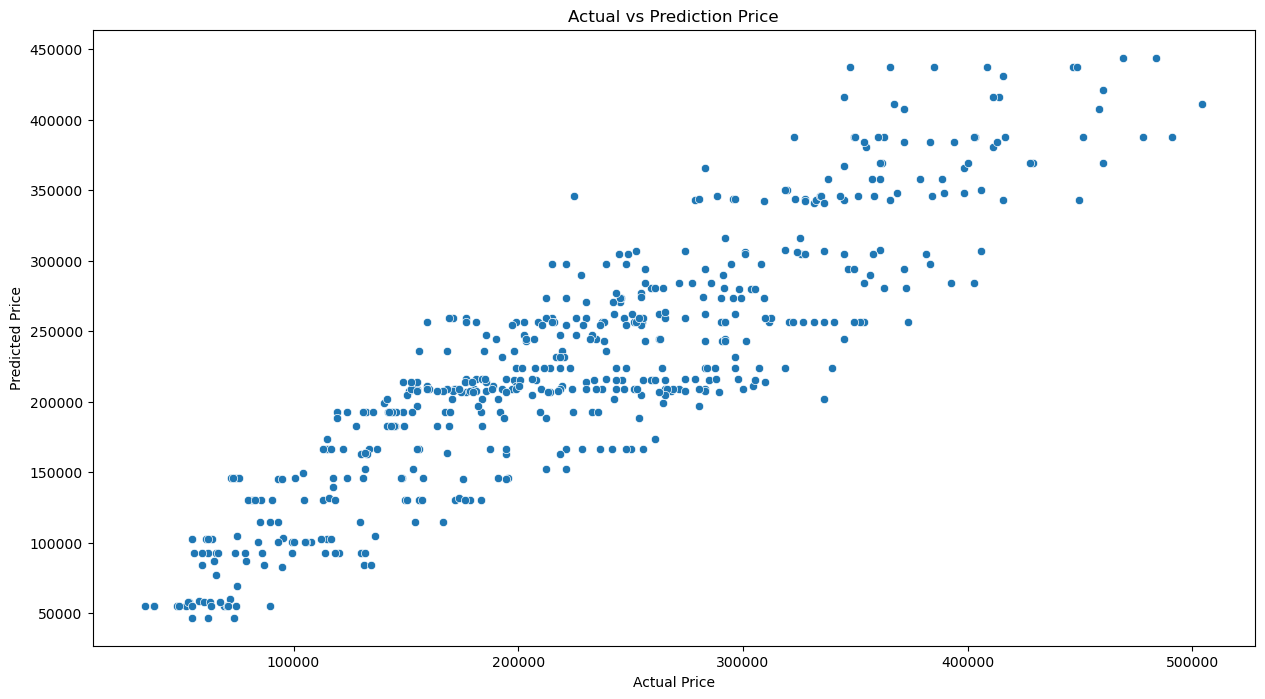

In [49]:
plt.figure(figsize=(15,8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs Prediction Price',
                                                          xlabel='Actual Price',
                                                          ylabel='Predicted Price')

**Interpretasi Hasil Model Prediksi**

**Keunggulan Model**:
1. **Kemampuan Prediksi yang Baik**.
   - Dengan nilai **R² sebesar 79,5%**, model berhasil menjelaskan sebagian besar variabilitas data harga aktual, menunjukkan bahwa model ini sangat andal untuk digunakan dalam memprediksi harga.

2. **Kesalahan Relatif Rendah**.
   - MAPE sebesar **19,5%** menunjukkan bahwa model memiliki tingkat kesalahan prediksi yang cukup rendah dibandingkan dengan harga aktual. Artinya, model ini memberikan hasil yang cukup presisi untuk pengambilan keputusan.

3. **Efisiensi dalam Kesalahan Absolut**.
   - **Mean Absolute Error (MAE)** sebesar 37,254 menunjukkan bahwa rata-rata kesalahan model berada dalam kisaran yang dapat diterima, terutama dalam konteks dataset dengan rentang harga yang luas.

4. **Fleksibilitas**.
   - Grafik hubungan harga aktual dan prediksi memperlihatkan pola linear yang kuat, menandakan bahwa model bekerja dengan baik di sebagian besar rentang harga, sehingga dapat diandalkan untuk berbagai skenario.

**Potensi Penggunaan**:
- Model ini dapat digunakan secara langsung untuk **estimasi harga properti** atau aset lain, memberikan prediksi yang cukup akurat bagi pengguna.
- Hasil prediksi yang mendekati aktual akan memberikan kepercayaan lebih kepada klien atau investor dalam pengambilan keputusan.

**Rencana Optimalisasi untuk Masa Depan**:
- Model saat ini sudah sangat baik, tetapi dapat lebih dioptimalkan dengan **peningkatan data** atau **penyesuaian hyperparameter**, yang akan semakin menurunkan tingkat kesalahan prediksi.
- Dengan peningkatan ini, potensi keuntungan dari prediksi yang lebih presisi dapat dimaksimalkan.

### 5.4 Feature Importances

Untuk mengetahui fitur mana yang paling berpengaruh terhadap target (harga), salah satu cara yang dapat dilakukan adalah dengan memeriksa menggunakan fungsi `feature_importances_`.

In [50]:
# Feature Importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp.to_frame(name='Feature Importances')

,Feature Importances
remainder__N_FacilitiesNearBy(PublicOffice),0.251633
remainder__Size(sqf),0.208351
binary_encoder__SubwayStation_3,0.192312
remainder__N_FacilitiesInApt,0.158408
remainder__N_FacilitiesNearBy(ETC),0.066732
remainder__N_Parkinglot(Basement),0.023719
binary_encoder__SubwayStation_2,0.021676
remainder__YearBuilt,0.020375
ordinal_encoder__TimeToSubway,0.018350
one_hot_encoder__HallwayType_terraced,0.015166


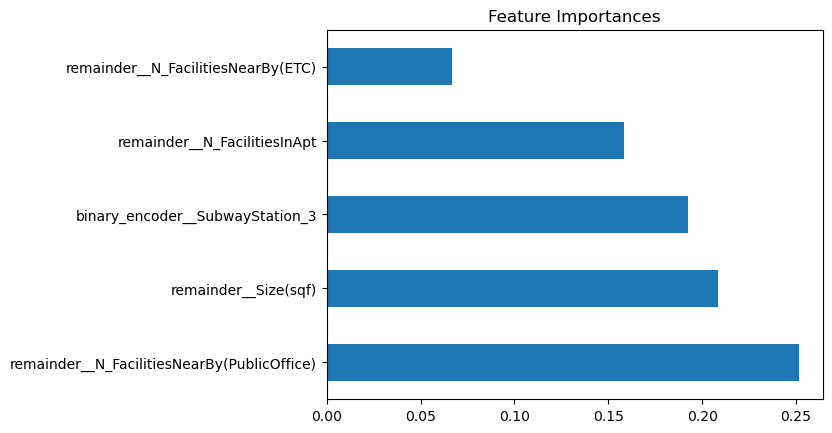

In [51]:
# Plot Feature Importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

1. **Fitur Terpenting**:
   `remainder__N_FacilitiesNearBy(PublicOffice)` memiliki nilai penting tertinggi (~0.25). Ini menunjukkan bahwa keberadaan fasilitas publik (kantor publik) di sekitar properti adalah faktor paling signifikan dalam menentukan harga properti.
   
2. **Ukuran Properti**:
   `remainder__Size(sqf)` memiliki pengaruh besar (~0.20), menjadikan ukuran properti salah satu indikator utama dalam menentukan nilai harga.

3. **Akses ke Transportasi**:
   `binary_encoder__SubwayStation_3` (~0.15) menunjukkan bahwa akses ke transportasi umum (stasiun kereta bawah tanah) adalah faktor yang cukup penting dalam memengaruhi nilai properti.

4. **Jumlah Fasilitas dalam Apartemen**:
   `remainder__N_FacilitiesInApt` (~0.10) menunjukkan bahwa jumlah fasilitas di dalam apartemen juga memengaruhi harga properti.

5. **Fitur dengan Pengaruh Rendah**:
   `remainder__N_FacilitiesNearBy(ETC)` memiliki nilai penting terendah (~0.05), menandakan dampaknya lebih kecil dibandingkan fitur lainnya.

## **6. Conclusion**

Berdasarkan pemodelan yang telah dilakukan, metrik evaluasi yang digunakan adalah R-Square, RMSE, MAE, dan MAPE. Setelah dilakukan tuning hyperparameter, model ini menunjukkan nilai MAPE sebesar 19,5%. Artinya, jika model ini digunakan untuk memperkirakan harga properti di Daegu dalam rentang data pelatihan (harga maksimum 511062 won), prediksi rata-rata akan menyimpang sekitar 19,5% dari harga sebenarnya.

Fitur yang paling berpengaruh terhadap harga properti adalah `N_FacilitiesNearBy(PublicOffice)` (0.25), yang menunjukkan bahwa keberadaan fasilitas publik di sekitar properti memiliki dampak besar pada penentuan harganya. Selain itu, `Size(sqf)` (0.20) dan akses ke stasiun kereta bawah tanah (`SubwayStation_3`, 0.15) juga memberikan kontribusi signifikan terhadap harga properti.

Meskipun model ini cukup akurat, masih ada kemungkinan bahwa prediksi dapat menyimpang lebih jauh dari harga aktual, yang kemungkinan disebabkan oleh bias dalam dataset, terutama terkait fitur-fitur yang mungkin belum cukup merepresentasikan karakteristik apartemen di Daegu, seperti jenis fasilitas di dalam gedung apartemen.

Dengan model akhir yang telah dipilih, fitur-fitur terpenting seperti keberadaan fasilitas publik, ukuran apartemen, dan akses transportasi dapat membantu agen real estate dalam menetapkan harga jual yang lebih akurat untuk apartemen di Daegu, Korea Selatan, sehingga dapat meningkatkan keberhasilan penjualan.

Sebelum adanya model regresi ini, kita hanya memiliki data mentah mengenai karakteristik dan harga properti di Daegu yang sulit diinterpretasikan. Model regresi ini memberikan wawasan yang lebih dalam tentang bagaimana setiap karakteristik memengaruhi harga dan membantu memprediksi perubahan harga jika terjadi perubahan pada fitur-fitur tersebut. Dampak dari penggunaan model regresi ini jauh lebih signifikan, karena memungkinkan agen properti membuat keputusan yang lebih tepat dalam menetapkan harga.

## **7. Recommendation**

1. **Menambah Fitur yang Lebih Relevan**  
   Sebaiknya mempertimbangkan untuk menambahkan fitur-fitur yang memiliki pengaruh langsung terhadap harga properti di Daegu, Korea Selatan. Fitur-fitur tersebut bisa mencakup pada lantai berapa apartemen berada, tahun penjualan, jumlah ruangan dalam apartemen, dan informasi lainnya terkait inklusivitas apartemen.

2. **Memperhitungkan Faktor Eksternal yang Lebih Luas**  
   Perlu juga mempertimbangkan faktor-faktor eksternal yang dapat mempengaruhi harga jual apartemen secara keseluruhan, seperti faktor ekonomi. Faktor-faktor ini dapat memberikan gambaran yang lebih luas mengenai pengaruh ekonomi terhadap pasar properti.

3. **Meningkatkan Jumlah dan Kualitas Dataset**  
   Untuk meningkatkan akurasi model prediksi, disarankan untuk memperluas dataset baik dari segi jumlah maupun kualitas data yang relevan. Dataset yang lebih lengkap dan berkualitas akan membantu model regresi untuk mempelajari pola-pola yang lebih baik, sehingga dapat menghasilkan prediksi yang lebih akurat.

4. **Mengeksplorasi Model Machine Learning yang Lebih Kompleks**  
   Pertimbangkan untuk menggunakan model machine learning yang lebih canggih, atau model lain yang lebih kompleks, guna meningkatkan performa prediksi. Namun, perlu diingat bahwa model yang lebih kompleks bisa juga jadi lebih sulit untuk dipahami dan diinterpretasikan oleh pengguna.

-----

Sumber:

1. Daegu - Wikipedia (https://id.wikipedia.org/wiki/Daegu)

In [52]:
# Save Model
import pickle

final_model = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
final_model.fit(x_train, y_train)

pickle.dump(final_model, open('Daegu_Apartment_XGB.sav', 'wb'))

In [53]:
# Load Model
filename = 'Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [54]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))

45764.10448462754